C:\Users\kayze\AppData\Local\Temp\ipykernel_18576\3371404371.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data_1995['DATE'] = pd.to_datetime(year_data_1995['DATE']) - pd.to_timedelta(7, unit='d')


<AxesSubplot: xlabel='DATE'>

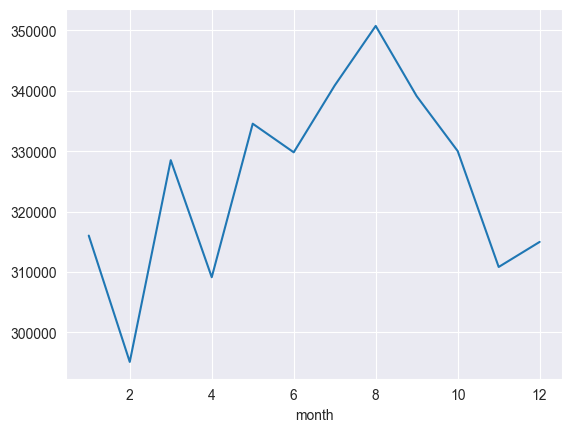

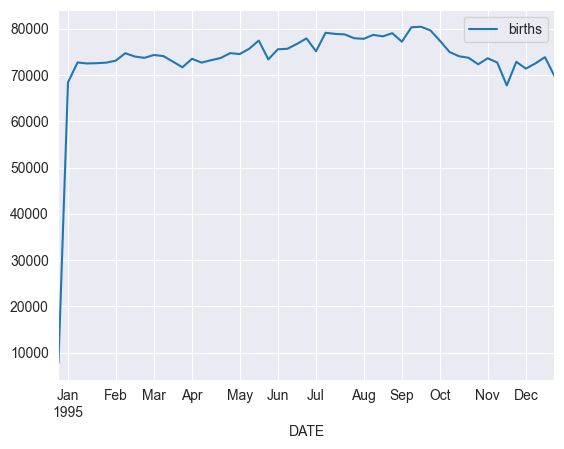

In [23]:
import seaborn as sns
import pandas as pd

first_dataset = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_1994-2003_CDC_NCHS.csv")
second_dataset = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv")


first_dataset = first_dataset[first_dataset.year < 2002]
second_dataset = second_dataset[second_dataset.year >= 2002]
years_data = pd.concat([first_dataset,second_dataset])
years_data = years_data.rename(columns = {'date_of_month' : 'day'})
years_data['DATE'] = pd.to_datetime(years_data[['year','month','day']])

year_data_1995 = years_data[years_data.year == 1995]

year_data_1995Month = year_data_1995.groupby('month')['births'].sum()
year_data_1995Month.plot(x = 'month', y = 'births')

year_data_1995['DATE'] = pd.to_datetime(year_data_1995['DATE']) - pd.to_timedelta(7, unit='d')
year_data_1995_week = year_data_1995.groupby([pd.Grouper(key='DATE', freq='W')])['births'].sum().reset_index()

year_data_1995_week.plot(x = 'DATE', y = 'births')


<AxesSubplot: xlabel='month'>

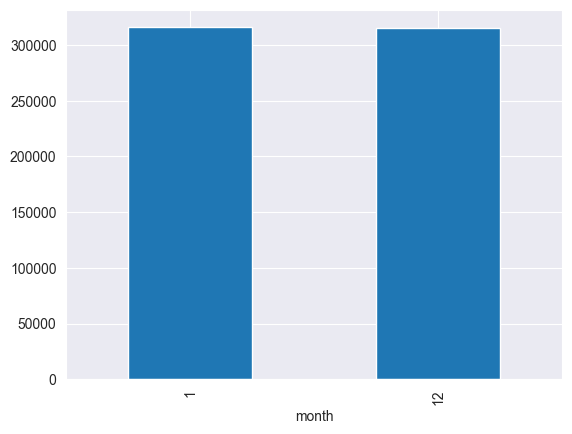

In [24]:
year_data_1995Month.iloc[[0,11]].plot(kind = "bar")

C:\Users\kayze\AppData\Local\Temp\ipykernel_18576\3782903263.py:2: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=year_data_1995, x="day", y="births", hue="month", palette=color, errorbar=None)


<AxesSubplot: xlabel='day', ylabel='births'>

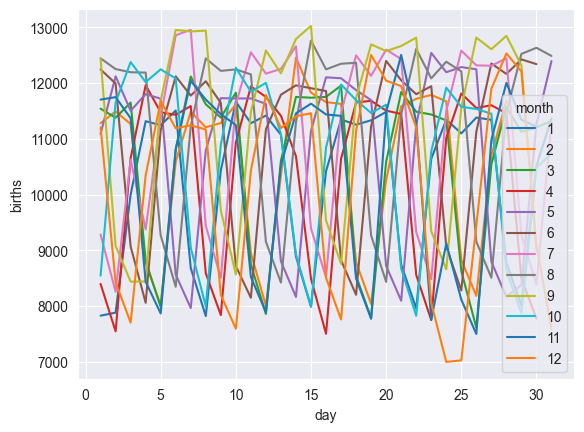

In [25]:
color = sns.color_palette()
sns.lineplot(data=year_data_1995, x="day", y="births", hue="month", palette=color, errorbar=None)

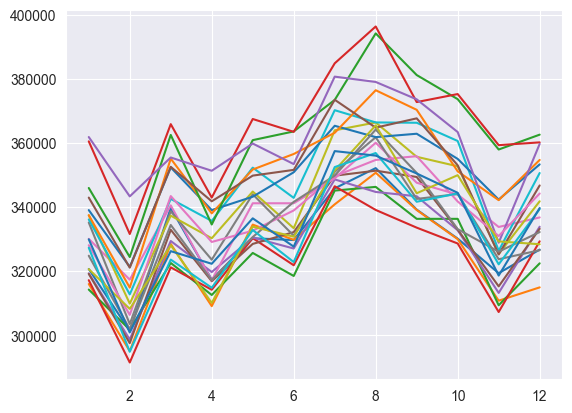

In [26]:
import matplotlib.pyplot as plt
datasetMonth = years_data.groupby(['year','month'])['births'].sum()
datasetMonth = datasetMonth.to_frame()
datasetMonth.reset_index(inplace = True)
for i in set(datasetMonth['year']):
    dfYear = datasetMonth[datasetMonth.year == i]
    plt.plot(dfYear['month'], dfYear['births'])